In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [11]:
mnist = tf.keras.datasets.mnist
(train_images, _), (test_images, _) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
# Flatten the 2D image data into 1D vectors
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


In [13]:
# Define the encoder
encoder_input = tf.keras.Input(shape=(28, 28, 1))
x = layers.Flatten()(encoder_input)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
encoder_output = layers.Dense(32, activation='relu')(x)

encoder = models.Model(encoder_input, encoder_output)

# Define the decoder
decoder_input = layers.Input(shape=(32,))
x = layers.Dense(64, activation='relu')(decoder_input)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(784, activation='sigmoid')(x)
decoder_output = layers.Reshape((28, 28, 1))(x)

decoder = models.Model(decoder_input, decoder_output)

# Combine the encoder and decoder to create the autoencoder
autoencoder_input = tf.keras.Input(shape=(28, 28, 1))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = models.Model(autoencoder_input, decoded)

autoencoder.compile(optimizer='adam', loss='mse')

In [14]:
autoencoder.fit(train_images, train_images, epochs=10, batch_size=128, shuffle=True, validation_data=(test_images, test_images))

Epoch 1/10
469/469 [==============================] - 7s 12ms/step - loss: 0.0477 - val_loss: 0.0272
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0233 - val_loss: 0.0200
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0188 - val_loss: 0.0169
Epoch 4/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0165 - val_loss: 0.0153
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0151 - val_loss: 0.0141
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0140 - val_loss: 0.0131
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0131 - val_loss: 0.0123
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0123 - val_loss: 0.0117
Epoch 9/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0118 - val_loss: 0.0113
Epoch 10/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0113 - val_lo

In [17]:
decoded_images = autoencoder.predict(test_images)
mse = np.mean(np.square(test_images - decoded_images), axis=(1, 2, 3))  # Mean squared error for each image

# Set a threshold for anomaly detection (e.g., based on a percentile of the MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Identify anomalies
anomalies = test_images[mse > threshold]

# Plot some normal and anomalous images
n_normal = 5
n_anomalous = 5

plt.figure(figsize=(10, 4))
for i in range(n_normal):
    plt.subplot(2, n_normal, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title('Normal')
    plt.axis('off')

for i in range(n_anomalous):
    plt.subplot(2, n_anomalous, i + 1 + n_normal)
    plt.imshow(anomalies[i], cmap='gray')
    plt.title('Anomalous')
    plt.axis('off')

plt.show()

313/313 [==============================] - 1s 4ms/step


ValueError: ignored

313/313 [==============================] - 1s 2ms/step


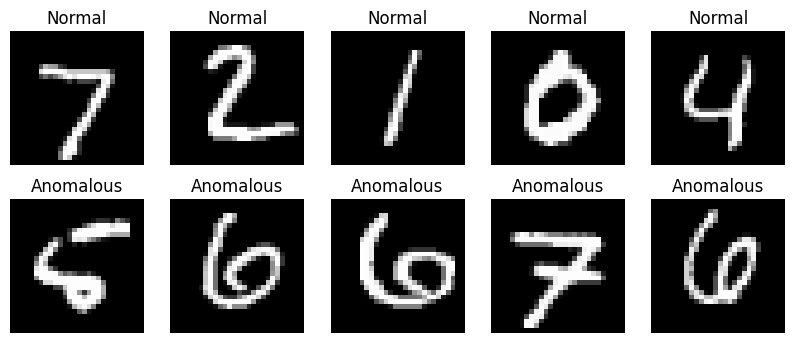

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to (num_samples, 28, 28, 1) for compatibility with the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Define the autoencoder model
encoder_input = tf.keras.Input(shape=(28, 28, 1))
x = layers.Flatten()(encoder_input)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
encoder_output = layers.Dense(32, activation='relu')(x)

encoder = models.Model(encoder_input, encoder_output)

decoder_input = layers.Input(shape=(32,))
x = layers.Dense(64, activation='relu')(decoder_input)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(784, activation='sigmoid')(x)
decoder_output = layers.Reshape((28, 28, 1))(x)

decoder = models.Model(decoder_input, decoder_output)

autoencoder_input = tf.keras.Input(shape=(28, 28, 1))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = models.Model(autoencoder_input, decoded)

autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(train_images, train_images, epochs=10, batch_size=128, shuffle=True, validation_data=(test_images, test_images))

# Evaluate the autoencoder and set a threshold for anomaly detection
decoded_images = autoencoder.predict(test_images)
mse = np.mean(np.square(test_images - decoded_images), axis=(1, 2, 3))

# Set a threshold for anomaly detection (e.g., based on a percentile of the MSE)
threshold = np.percentile(mse, 95)

# Identify anomalies
anomalies = test_images[mse > threshold]

# Plot some normal and anomalous images
n_normal = 5
n_anomalous = 5

plt.figure(figsize=(10, 4))
for i in range(n_normal):
    plt.subplot(2, n_normal, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title('Normal')
    plt.axis('off')

for i in range(n_anomalous):
    plt.subplot(2, n_anomalous, i + 1 + n_normal)
    plt.imshow(anomalies[i].reshape(28, 28), cmap='gray')
    plt.title('Anomalous')
    plt.axis('off')

plt.show()


In [24]:
print(len(anomalies))

500
